#Python For Data Ananlysts Assignment A1: In-Class Individual Assessment
**Student Name:** Abi Joshua George

**Student ID:** 50447171

**Date:** 12/11/2024

**AI Reference:**                                                    
OpenAI. (2024, December 11). ChatGPT [Large language model]. Retrieved from https://chatgpt.com/c/675990c3-26cc-800d-9c08-02718343e0a6

# Importing and Loading the Datasets

In [ ]:
# Importing the pandas library for data manipulation and analysis, and assign it to the alias 'pd'.
import pandas as pd

# Importing the numpy library for numerical computations, and assign it to the alias 'np'.
import numpy as np

# Importing the pyplot module from matplotlib for creating visualizations, and assign it to the alias 'plt'.
import matplotlib.pyplot as plt

# Importing the seaborn library for statistical data visualization, and assign it to the alias 'sns'.
import seaborn as sns

In [ ]:
# Loading the datasets into DataFrames
online_retail = pd.read_csv('Online Retail.csv')
wholesale_customers = pd.read_csv('Wholesale customers data.csv')

# Displaying the first few rows of each DataFrame to preview them
print("Online Retail Dataset:")
print(online_retail.head())  # Shows the first 5 rows of the Online Retail DataFrame

print("\nWholesale Customers Dataset:")
print(wholesale_customers.head())  # Shows the first 5 rows of the Wholesale Customers DataFrame


Online Retail Dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Wholesale Customers Dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1 

# Cleaning the Online Retail Dataset

In [ ]:
# Dropping rows with missing values in the 'CustomerID' column
online_retail.dropna(subset=['CustomerID'], inplace=True)

# Confirming the changes
print("After dropping rows with missing CustomerID:")
print(online_retail.info())


After dropping rows with missing CustomerID:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB
None


In [ ]:
# Removing rows with missing values in the 'Description' column.
online_retail.dropna(subset=['Description'], inplace=True)

# Printing the count of missing values for each column.
print(online_retail.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Printing the total number of duplicate rows in the DataFrame.
print(online_retail.duplicated().sum())

5225


In [ ]:
# Removing duplicate rows from the dataset
online_retail.drop_duplicates(inplace=True)

# Confirming there are no remaining duplicates (should return 0)
print(online_retail.duplicated().sum())

# Displaying the dataset structure and updated row count
print(online_retail.info())


0
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB
None


In [ ]:
# Resetting the index after cleaning the dataset
online_retail.reset_index(drop=True, inplace=True)

# Confirming the index reset
print(online_retail.head())  # Display the first few rows to confirm
print(online_retail.info())  # Verify structure


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [ ]:
# Converting the 'CustomerID' column to the integer data type.
online_retail['CustomerID'] = online_retail['CustomerID'].astype(int)

# Exploratory Data Analysis (EDA) for Online Retail Dataset

Dataset Overview

In [ ]:
print(online_retail.head())  # First 5 rows
print(online_retail.tail())  # Last 5 rows


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55       17850  United Kingdom  
1  12/1/2010 8:26       3.39       17850  United Kingdom  
2  12/1/2010 8:26       2.75       17850  United Kingdom  
3  12/1/2010 8:26       3.39       17850  United Kingdom  
4  12/1/2010 8:26       3.39       17850  United Kingdom  
       InvoiceNo StockCode                      Description  Quantity  \
401599    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
401600    581587     22899     CHILDREN'S APRON DOLLY GIRL         

In [ ]:
print(online_retail.describe())  # Numerical column statistics


            Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
print("Unique Countries:", online_retail['Country'].nunique())
print("Unique Products:", online_retail['Description'].nunique())
print("Unique Customers:", online_retail['CustomerID'].nunique())


Unique Countries: 37
Unique Products: 3896
Unique Customers: 4372


# Data Distributions

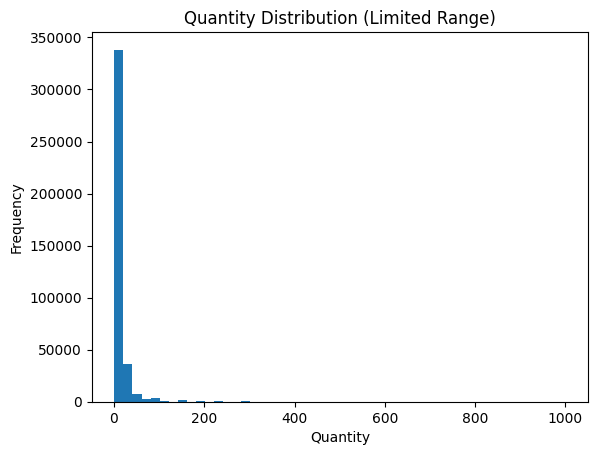

In [ ]:
# Quantity Distribution
online_retail[online_retail['Quantity'].between(0, 1000)]['Quantity'].plot(kind='hist', bins=50, title='Quantity Distribution (Limited Range)')
plt.xlabel('Quantity')
plt.show()



In [ ]:
# Outliers
outliers = online_retail[~online_retail['Quantity'].between(0, 1000)]
print(outliers.describe())


           Quantity     UnitPrice    CustomerID
count   8977.000000   8977.000000   8977.000000
mean       7.142475     18.689361  14996.742119
std     1660.712638    442.583540   1709.809816
min   -80995.000000      0.000000  12346.000000
25%       -6.000000      1.450000  13506.000000
50%       -2.000000      2.890000  14895.000000
75%       -1.000000      4.950000  16394.000000
max    80995.000000  38970.000000  18282.000000


In [ ]:
# Returns
returns = online_retail[online_retail['Quantity'] < 0]
print("Number of Returns:", returns.shape[0])
print(returns.head())


Number of Returns: 8872
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41      27.50       14527  United Kingdom  
154   12/1/2010 9:49       4.65       15311  United Kingdom  
235  12/1/2010 10:24       1.65       17548  United Kingdom  
236  12/1/2010 10:24       0.29       17548  United Kingdom  
237  12/1/2010 10:24       0.29       17548  United Kingdom  


In [ ]:
# Top Returned Products
top_returned_products = returns.groupby('Description')['Quantity'].sum().sort_values()
print(top_returned_products.head(10))  # Top 10 returned products


Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
ROTATING SILVER ANGELS T-LIGHT HLDR    -9367
Manual                                 -3995
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3150
WHITE HANGING HEART T-LIGHT HOLDER     -2578
GIN + TONIC DIET METAL SIGN            -2030
HERB MARKER BASIL                      -1527
FELTCRAFT DOLL MOLLY                   -1447
TEA TIME PARTY BUNTING                 -1424
Name: Quantity, dtype: int64


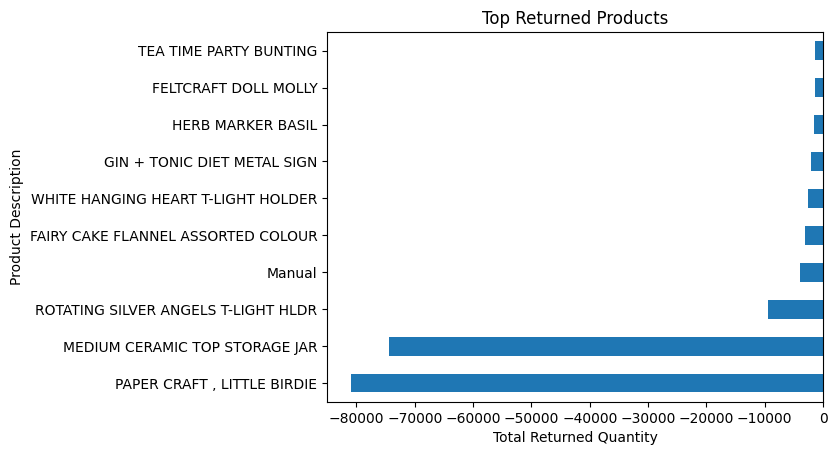

In [ ]:
# Top 10 Returned Products Visualization
top_returned_products.head(10).plot(kind='barh', title='Top Returned Products')
plt.xlabel('Total Returned Quantity')
plt.ylabel('Product Description')
plt.show()


In [ ]:
# Large Orders
large_orders = online_retail[online_retail['Quantity'] > 1000]
print(large_orders.head())


      InvoiceNo StockCode                        Description  Quantity  \
3566     536809     84950     ASSORTED COLOUR T-LIGHT HOLDER      1824   
3661     536830     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
3662     536830     21915             RED  HARMONICA IN BOX       1400   
4189     536890    17084R              ASSORTED INCENSE PACK      1440   
10675    537659     22189            CREAM HEART CARD HOLDER      1008   

           InvoiceDate  UnitPrice  CustomerID         Country  
3566   12/2/2010 16:48       0.55       15299  United Kingdom  
3661   12/2/2010 17:38       0.18       16754  United Kingdom  
3662   12/2/2010 17:38       1.06       16754  United Kingdom  
4189   12/3/2010 11:48       0.16       14156            EIRE  
10675  12/7/2010 16:43       2.31       18102  United Kingdom  


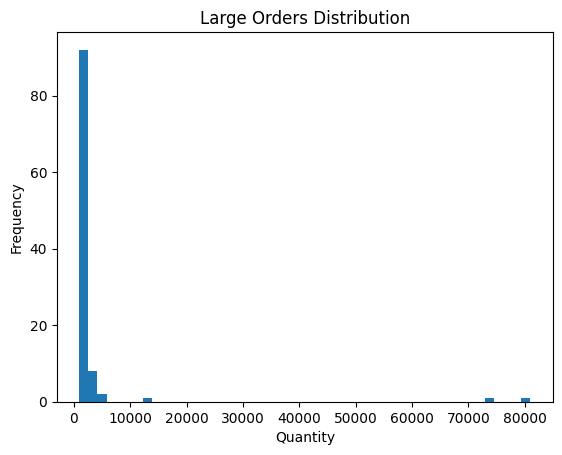

In [ ]:
# Large Orders Visualization
large_orders['Quantity'].plot(kind='hist', bins=50, title='Large Orders Distribution')
plt.xlabel('Quantity')
plt.show()


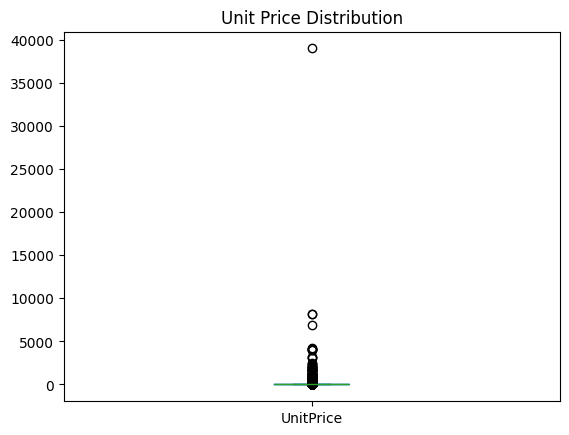

In [ ]:
# Unit Price Distribution
online_retail['UnitPrice'].plot(kind='box', title='Unit Price Distribution')
plt.show()

In [ ]:
outlier_prices = online_retail[online_retail['UnitPrice'] > 1000]
print(outlier_prices)


       InvoiceNo StockCode      Description  Quantity       InvoiceDate  \
28432    C540271         M           Manual        -1    1/6/2011 11:51   
44688    C542348         M           Manual        -1   1/27/2011 12:09   
77256    C546325         M           Manual        -1   3/11/2011 10:15   
77257    C546327         M           Manual        -1   3/11/2011 10:18   
77258     546328         M           Manual         1   3/11/2011 10:19   
77259     546329         M           Manual         1   3/11/2011 10:22   
98253     548813         M           Manual         1    4/4/2011 13:03   
98255     548813         M           Manual         1    4/4/2011 13:03   
98256     548820         M           Manual         1    4/4/2011 13:04   
98258    C548830         M           Manual        -1    4/4/2011 13:08   
98260    C548830         M           Manual        -1    4/4/2011 13:08   
98261    C548834         M           Manual        -1    4/4/2011 13:09   
98794     548913         

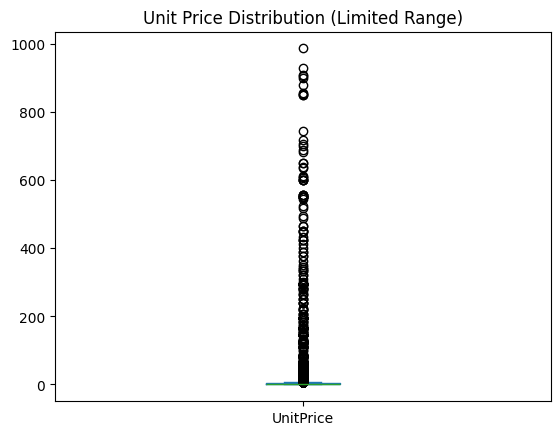

In [ ]:
online_retail[online_retail['UnitPrice'] <= 1000]['UnitPrice'].plot(kind='box', title='Unit Price Distribution (Limited Range)')
plt.show()


In [ ]:
zero_price_items = online_retail[online_retail['UnitPrice'] == 0]
print(zero_price_items)


       InvoiceNo StockCode                          Description  Quantity  \
6842      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
22619     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
25551     539722     22423             REGENCY CAKESTAND 3 TIER        10   
29374     540372     22090              PAPER BUNTING RETROSPOT        24   
29376     540372     22553               PLASTERS IN TIN SKULLS        24   
34903     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
54482     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
86760     547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
93947     548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
98634     548871     22162          HEART GARLAND RUSTIC PADDED         2   
108583    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
130286    553000     47566                        PARTY BUNTING         4   

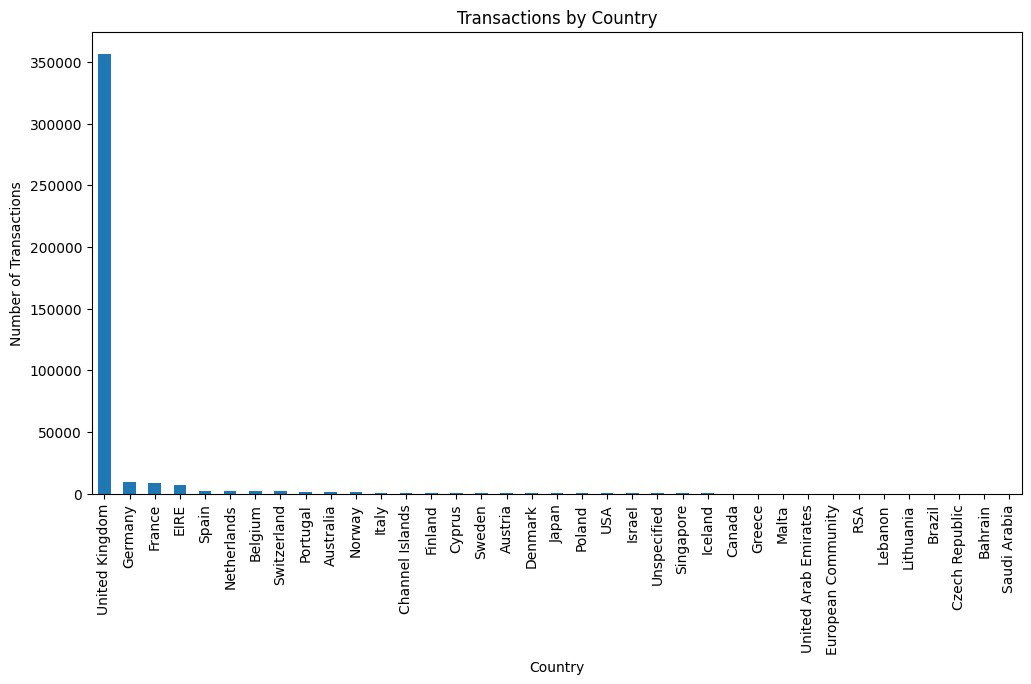

In [ ]:
# Country-wise Transaction Count
country_counts = online_retail['Country'].value_counts()
country_counts.plot(kind='bar', title='Transactions by Country', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()


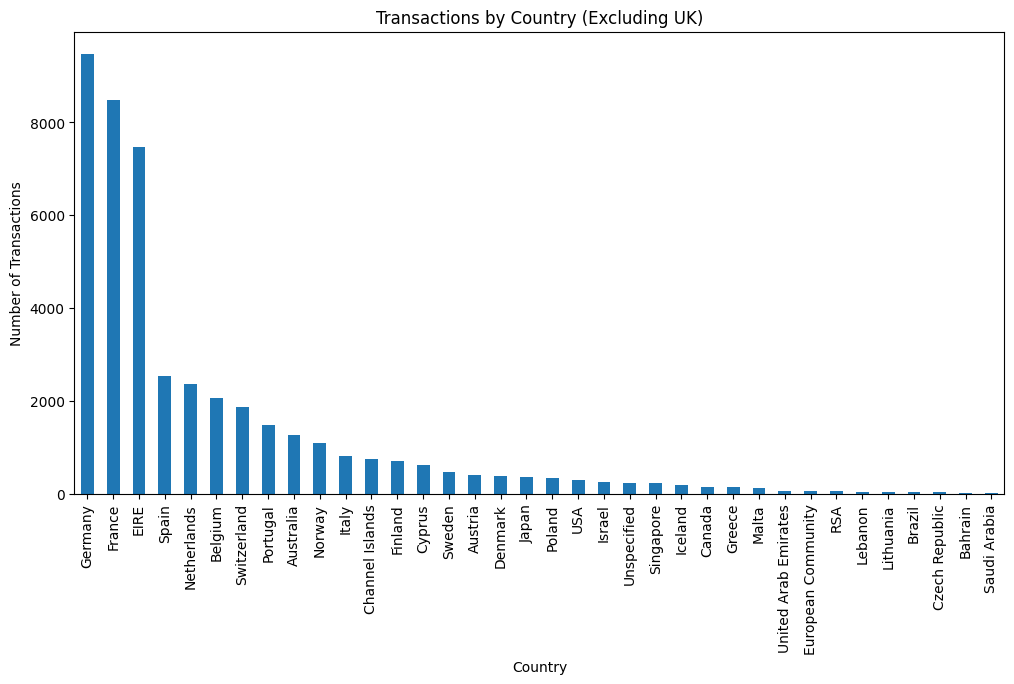

In [ ]:
country_counts_no_uk = country_counts.drop('United Kingdom')
country_counts_no_uk.plot(kind='bar', title='Transactions by Country (Excluding UK)', figsize=(12, 6))
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()


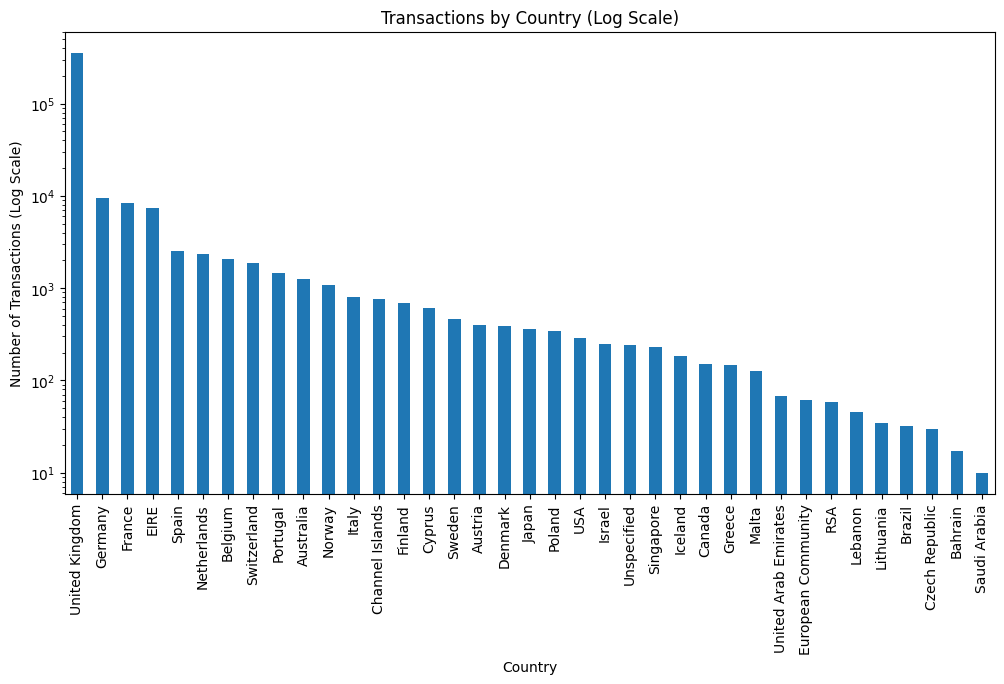

In [ ]:
country_counts.plot(kind='bar', title='Transactions by Country (Log Scale)', figsize=(12, 6), logy=True)
plt.xlabel('Country')
plt.ylabel('Number of Transactions (Log Scale)')
plt.show()


# Relationships and Trends

In [ ]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])


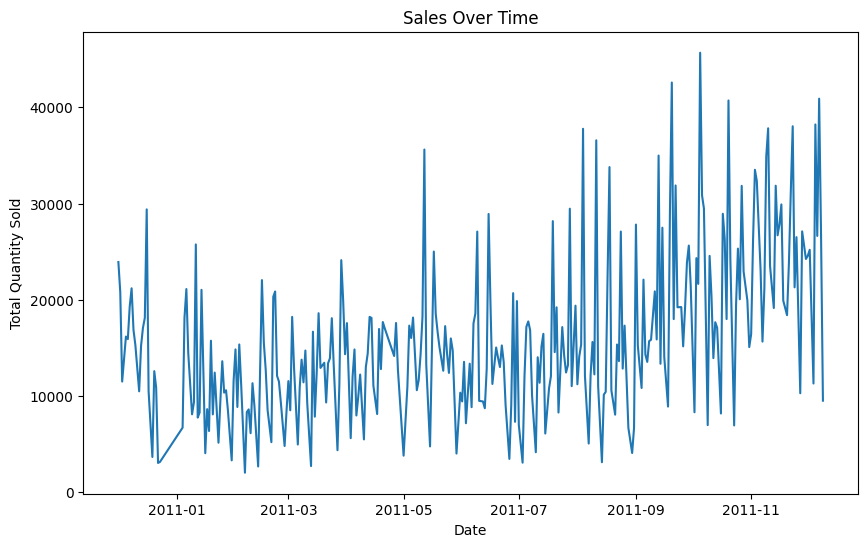

In [ ]:
sales_by_date = online_retail.groupby(online_retail['InvoiceDate'].dt.date)['Quantity'].sum()
sales_by_date.plot(title='Sales Over Time', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.show()


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


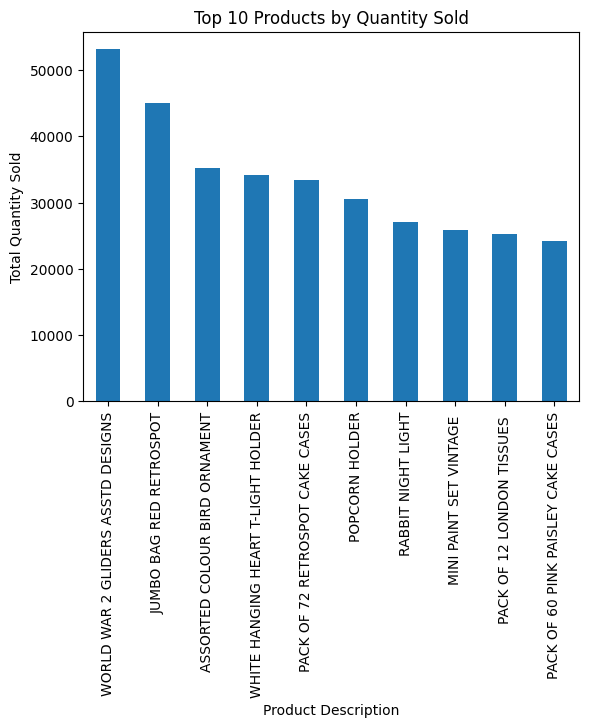

In [ ]:
top_products = online_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)
top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()


Description
BLOSSOM IMAGES SCRAP BOOK SET          1
PACK 4 FLOWER/BUTTERFLY PATCHES        1
BLACK DROP EARRINGS W LONG BEADS       1
VINTAGE BEAD PINK JEWEL STAND          1
SET/3 FLORAL GARDEN TOOLS IN BAG       1
WHITE ROSEBUD  PEARL EARRINGS          1
WHITE STONE/CRYSTAL EARRINGS           1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
CROCHET DOG KEYRING                    1
CAKE STAND LACE WHITE                  1
Name: Quantity, dtype: int64


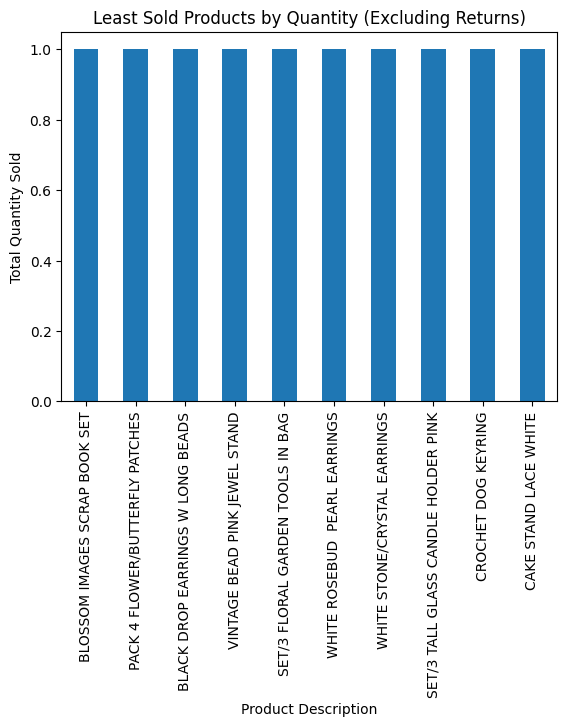

In [ ]:
# Filter out returned products (negative quantities)
sold_products = online_retail[online_retail['Quantity'] > 0]

# Find the least sold products (excluding returns)
least_sold_products = sold_products.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10)

# Display the least sold products
print(least_sold_products)

# Plot the least sold products
least_sold_products.plot(kind='bar', title='Least Sold Products by Quantity (Excluding Returns)')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.show()



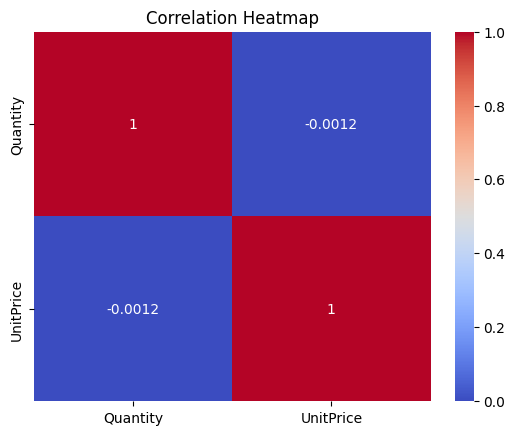

In [ ]:
correlation = online_retail[['Quantity', 'UnitPrice']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Anomalies and Outliers

In [ ]:
outliers = online_retail[online_retail['Quantity'] < 0]
print(outliers)


       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
401159   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
401243   C581499         M                            Manual        -1   
401410   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
401411   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
401412   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50      

In [ ]:
invalid_prices = online_retail[online_retail['UnitPrice'] <= 0]
print(invalid_prices)


       InvoiceNo StockCode                          Description  Quantity  \
6842      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
22619     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
25551     539722     22423             REGENCY CAKESTAND 3 TIER        10   
29374     540372     22090              PAPER BUNTING RETROSPOT        24   
29376     540372     22553               PLASTERS IN TIN SKULLS        24   
34903     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
54482     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
86760     547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
93947     548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
98634     548871     22162          HEART GARLAND RUSTIC PADDED         2   
108583    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
130286    553000     47566                        PARTY BUNTING         4   

# RFM Analysis

In [ ]:
# Calculate Recency, Frequency, Monetary
now = pd.Timestamp('2011-12-10')  # Assuming dataset ends here
rfm = online_retail.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'count',                          # Frequency
    'UnitPrice': lambda x: (x * online_retail['Quantity']).sum()  # Monetary
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           325          2      0.00
12347             2        182   4310.00
12348            75         31   1797.24
12349            18         73   1757.55
12350           310         17    334.40


# Time Series Analysis

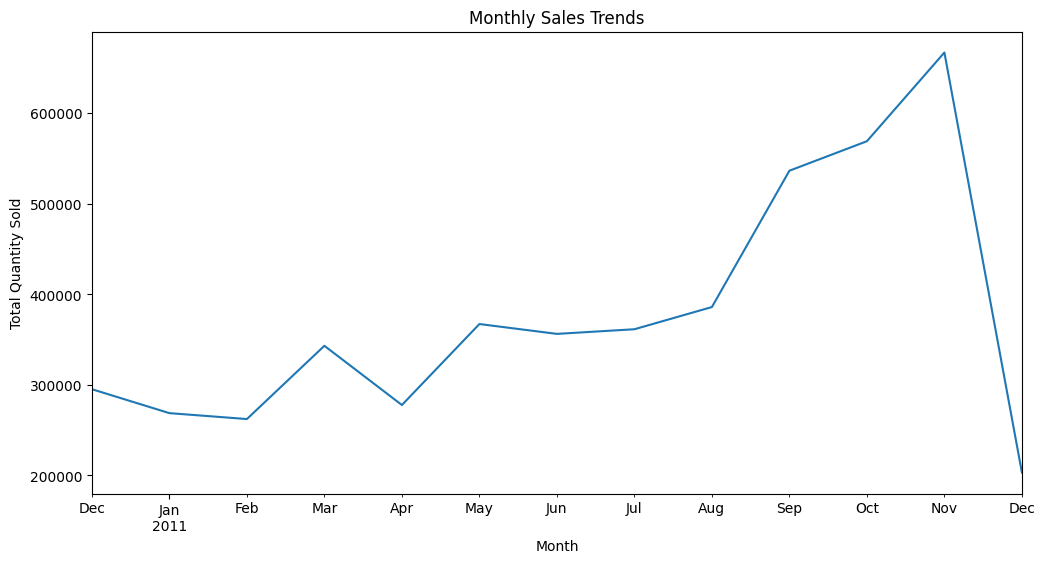

In [ ]:
monthly_sales = online_retail.groupby(online_retail['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sales.plot(title='Monthly Sales Trends', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


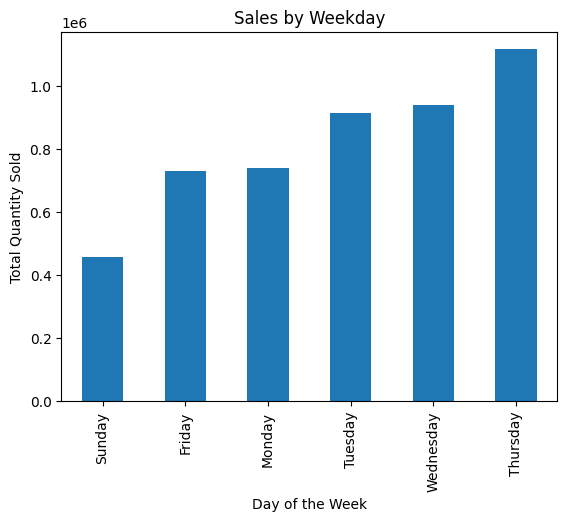

In [ ]:
online_retail['Weekday'] = online_retail['InvoiceDate'].dt.day_name()
weekday_sales = online_retail.groupby('Weekday')['Quantity'].sum().sort_values()
weekday_sales.plot(kind='bar', title='Sales by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.show()


# Profitability Analysis

In [ ]:
online_retail['TotalPrice'] = online_retail['Quantity'] * online_retail['UnitPrice']
product_profit = online_retail.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
print(product_profit.head(10))


Description
REGENCY CAKESTAND 3 TIER              132567.70
WHITE HANGING HEART T-LIGHT HOLDER     93767.80
JUMBO BAG RED RETROSPOT                83056.52
PARTY BUNTING                          67628.43
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56331.91
RABBIT NIGHT LIGHT                     51042.84
CHILLI LIGHTS                          45915.41
PAPER CHAIN KIT 50'S CHRISTMAS         41423.78
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64


# Key Findings


**Transactions by Country:**

The United Kingdom accounts for the overwhelming majority of
transactions, with other countries like Germany, France, and Ireland following but at much lower levels.
Non-UK transactions are significantly smaller, indicating the business heavily relies on domestic sales.

**Sales Trends Over Time:**

Sales fluctuate daily with noticeable peaks and dips, indicating irregular demand patterns.
There is a gradual upward trend in sales toward the end of the year, likely influenced by seasonal factors like holidays.

**Top Products:**

The most sold product is "WORLD WAR 2 GLIDERS ASSTD DESIGNS", with over 53,000 units sold, followed by "JUMBO BAG RED RETROSPOT" and decorative items.
The top-selling products are a mix of practical items (e.g., storage bags) and decorative goods (e.g., ornaments and t-light holders).

**Least Sold Products:**

Several products, including "BLOSSOM IMAGES SCRAP BOOK SET" and "VINTAGE BEAD PINK JEWEL STAND", have only 1 unit sold.
These products might indicate inventory mismanagement or niche demand.

**Correlation Between Quantity and Unit Price:**

A near-zero correlation (-0.0012) indicates no significant relationship between Quantity and UnitPrice. High sales volume does not necessarily equate to high prices.

**Anomalies:**

There are negative quantities (returns) and invalid zero or negative unit prices in the dataset:
Returns are significant, especially for certain items like "ROTATING SILVER ANGELS T-LIGHT HOLDER" (-1,475 units returned).
Zero or negative prices were identified in some transactions, suggesting data entry errors or freebies.

**RFM Analysis:**

**Recency:**

Customers like 12346 (325 days since last purchase) are disengaged and may need reactivation strategies.
Active customers like 12349 (18 days since last purchase) contribute more frequently.

**Frequency:**

High-frequency customers (e.g., 12347 with 182 transactions) are likely to be repeat purchasers or wholesalers.
Customers with lower frequency need strategies to increase engagement.

**Monetary:**

Customers like 12347 (spending 4310.00) are the most valuable and should be targeted with loyalty programs.
Zero-spending customers may indicate anomalies or unfulfilled transactions.

**Monthly Sales Trends:**

Sales consistently increased toward the end of the year, peaking in November.
February, May, and July showed noticeable dips, which may indicate seasonality or less demand during those months.

**Sales by Weekday:**

Thursday was the highest-performing day for sales, followed closely by Wednesday and Tuesday.
Sunday has the lowest sales, suggesting it is the least active day for customer transactions.

**Profitability Analysis:**

The top profitable product is "REGENCY CAKESTAND 3 TIER", generating over 132,000 in revenue.
Other highly profitable products include "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT".
Profitable products overlap significantly with the top-selling products, showing consistency between volume and revenue.

# Business Recommendations

**Expand International Reach:**

Invest in marketing and logistical support for high-performing international markets like Germany, France, and Ireland to reduce dependency on the UK market.
Tailor product offerings and promotions to these regions based on their cultural preferences and past sales.
Optimize Inventory Management:

**Focus on Top Products:**

Increase inventory and marketing efforts for the most sold items to sustain high sales.
Address Least Sold Products: Analyze why certain items are underperforming. Consider discontinuing or rebranding these products to reduce inventory costs.

**Address Anomalies and Errors:**

Implement stricter quality checks and validation rules during data entry to minimize errors in pricing and returns.
For items with significant returns, like "ROTATING SILVER ANGELS T-LIGHT HOLDER", investigate the root cause (e.g., quality, description issues) and take corrective measures.

**Seasonal Sales Strategy:**

Develop targeted campaigns during high-demand periods, especially around the holidays, to capitalize on seasonal sales peaks.
Offer discounts or bundles for slower months to maintain consistent revenue.

**Customer Segmentation and Retention:**

Analyze customer behavior to identify loyal or high-value customers.
Use targeted marketing campaigns and loyalty programs to encourage repeat purchases.

**Refine Pricing Strategy:**

Reassess products with zero or unusually high prices to ensure consistency and accuracy in pricing.
Experiment with dynamic pricing strategies to optimize revenue across product categories.

**Customer Retention and Reactivation:**

**High-Value Customers:**

Focus loyalty efforts on frequent and high-spending customers like 12347.
Provide exclusive discounts or early access to new products.

**Disengaged Customers:**

Reactivate disengaged customers (e.g., 12346) with targeted email campaigns offering personalized discounts or incentives.

**Inventory and Marketing:**

**Top-Performing Products:**

Increase inventory for the top 10 most profitable products (e.g., "REGENCY CAKESTAND 3 TIER").
Feature these items prominently in advertising campaigns.

**Low-Season Months:**

Introduce promotions or bundles during February, May, and July to boost sales during slow months.
Leverage holiday-driven demand in November with aggressive marketing and adequate stock planning.

**Weekday-Specific Campaigns:**

**Midweek Promotions:**

Focus discounts or special offers on high-performing weekdays (Tuesday, Wednesday, Thursday) to further maximize sales.

**Sunday Strategy:**
Offer free shipping or time-sensitive deals on Sundays to improve engagement on the least active day.

**Profit Maximization:**

Continue prioritizing highly profitable products while analyzing whether profitability aligns with customer demand across all regions.
Evaluate less profitable products for potential discontinuation or repositioning.

**Seasonal Strategy:**

Prepare for significant demand spikes in November with advance inventory stocking and streamlined logistics.
Run post-holiday promotions in December to manage leftover inventory and maintain engagement.

# Exploratory Data Analysis (EDA) for Wholesale Customers Dataset

In [ ]:
# Summary statistics
print(wholesale_customers.describe())


          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

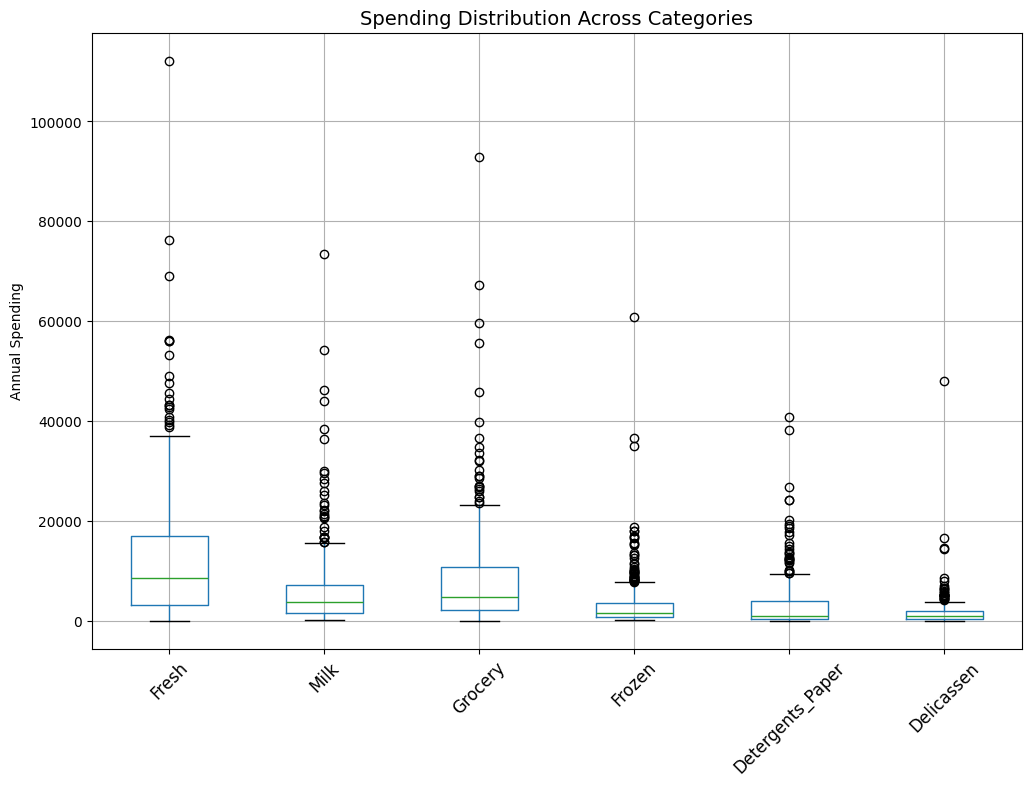

In [ ]:
# Boxplot for spending distribution across categories
plt.figure(figsize=(12, 8))
wholesale_customers.iloc[:, 2:].boxplot()
plt.title('Spending Distribution Across Categories', fontsize=14)
plt.ylabel('Annual Spending')
plt.xticks(rotation=45, fontsize=12)
plt.show()


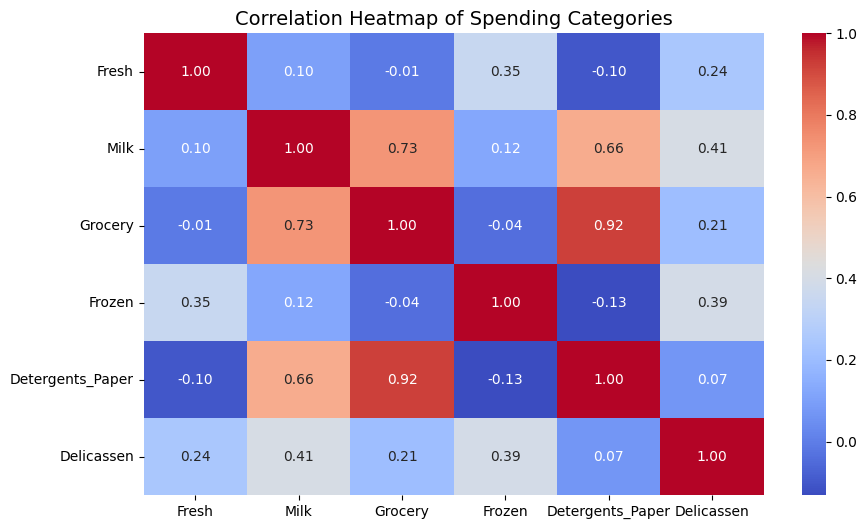

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = wholesale_customers.iloc[:, 2:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Spending Categories', fontsize=14)
plt.show()


In [ ]:
# Top spenders for each category
categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for category in categories:
    top_spenders = wholesale_customers.nlargest(10, category)[['Region', 'Channel', category]]
    print(f"Top 10 spenders in {category}:")
    print(top_spenders)
    print("\n")


Top 10 spenders in Fresh:
     Region  Channel   Fresh
181       3        1  112151
125       3        1   76237
284       3        1   68951
39        3        1   56159
258       1        1   56083
103       3        1   56082
259       1        1   53205
282       3        1   49063
239       1        1   47493
176       3        1   45640


Top 10 spenders in Milk:
     Region  Channel   Milk
86        3        2  73498
47        3        2  54259
85        3        2  46197
183       3        1  43950
61        3        2  38369
23        3        2  36423
56        3        2  29892
181       3        1  29627
211       1        2  28326
92        3        2  27472


Top 10 spenders in Grocery:
     Region  Channel  Grocery
85        3        2    92780
333       2        2    67298
61        3        2    59598
47        3        2    55571
65        3        2    45828
211       1        2    39694
216       1        2    36486
145       3        2    34792
251       1        2

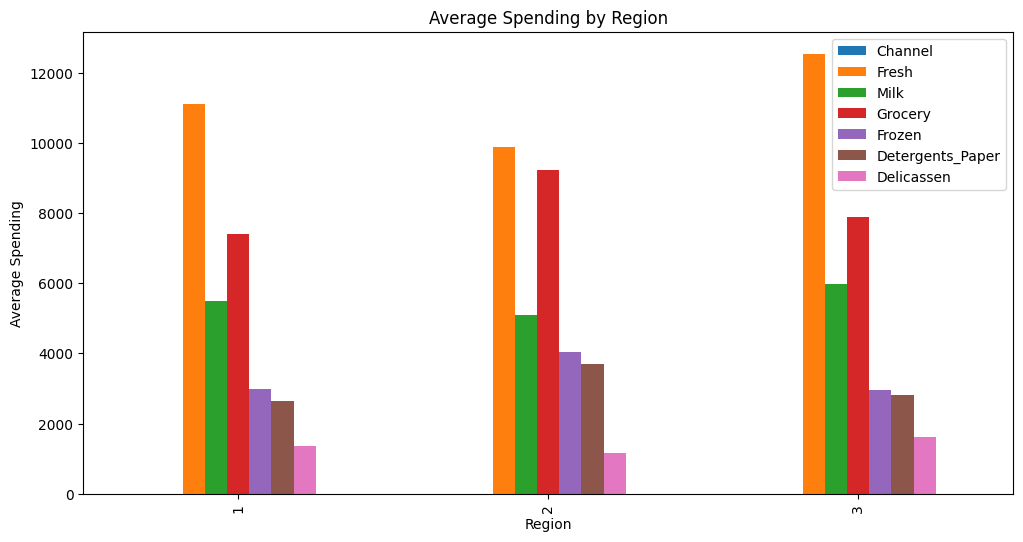

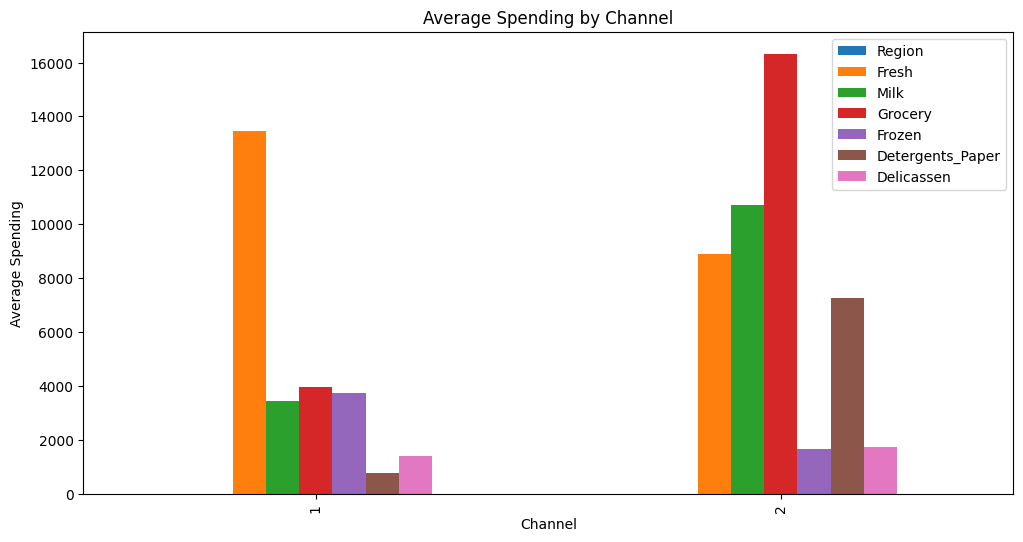

In [ ]:
# Spending distribution by Region
region_spending = wholesale_customers.groupby('Region').mean()
region_spending.plot(kind='bar', figsize=(12, 6), title='Average Spending by Region')
plt.ylabel('Average Spending')
plt.xlabel('Region')
plt.show()

# Spending distribution by Channel
channel_spending = wholesale_customers.groupby('Channel').mean()
channel_spending.plot(kind='bar', figsize=(12, 6), title='Average Spending by Channel')
plt.ylabel('Average Spending')
plt.xlabel('Channel')
plt.show()


In [ ]:
# Outliers for each category
for category in categories:
    outliers = wholesale_customers[wholesale_customers[category] > wholesale_customers[category].quantile(0.95)]
    print(f"Outliers in {category}:")
    print(outliers[['Region', 'Channel', category]])
    print("\n")


Outliers in Fresh:
     Region  Channel   Fresh
29        3        1   43088
39        3        1   56159
47        3        2   44466
52        3        2   40721
87        3        1   43265
103       3        1   56082
125       3        1   76237
129       3        1   42312
142       3        1   37036
176       3        1   45640
181       3        1  112151
183       3        1   36847
239       1        1   47493
258       1        1   56083
259       1        1   53205
282       3        1   49063
284       3        1   68951
285       3        1   40254
289       3        1   42786
370       3        2   39679
377       3        1   38793
436       3        1   39228


Outliers in Milk:
     Region  Channel   Milk
23        3        2  36423
28        3        2  20484
45        3        2  22044
47        3        2  54259
49        3        2  21412
56        3        2  29892
61        3        2  38369
65        3        2  20959
85        3        2  46197
86        3   

# Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wholesale_customers.iloc[:, 2:])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
wholesale_customers['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize cluster means
cluster_means = wholesale_customers.groupby('Cluster').mean()
print(cluster_means)


          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


# Regional Analysis

In [ ]:
# Calculate the mean of each numerical feature grouped by 'Region'
region_summary = wholesale_customers.groupby('Region').mean()

# Print the summary statistics for each region
print(region_summary)



         Channel         Fresh         Milk      Grocery       Frozen  \
Region                                                                  
1       1.233766  11101.727273  5486.415584  7403.077922  3000.337662   
2       1.404255   9887.680851  5088.170213  9218.595745  4045.361702   
3       1.332278  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper   Delicassen   Cluster  
Region                                           
1            2651.116883  1354.896104  0.272727  
2            3687.468085  1159.702128  0.382979  
3            2817.753165  1620.601266  0.278481  


<Figure size 1200x600 with 0 Axes>

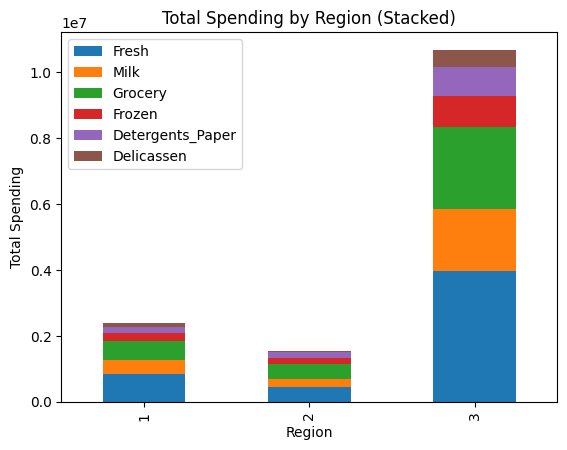

In [ ]:
# Plot total spending by region
plt.figure(figsize=(12, 6))
wholesale_customers.groupby('Region').sum().iloc[:, 1:-1].plot(kind='bar', stacked=True)  # Exclude 'Profit' column
plt.title('Total Spending by Region (Stacked)')
plt.ylabel('Total Spending')
plt.xlabel('Region')
plt.show()



# Pareto Analysis

In [ ]:
wholesale_customers['TotalSpending'] = wholesale_customers.iloc[:, 2:].sum(axis=1)
pareto = wholesale_customers.sort_values('TotalSpending', ascending=False)
pareto['CumulativePercentage'] = pareto['TotalSpending'].cumsum() / pareto['TotalSpending'].sum() * 100
print(pareto[['TotalSpending', 'CumulativePercentage']])


     TotalSpending  CumulativePercentage
85          199893              1.367292
47          192716              2.685493
181         190170              3.986278
183         185684              5.256379
61          165883              6.391039
..             ...                   ...
131           3730             99.938282
355           3485             99.962119
98            2476             99.979056
97            2158             99.993817
154            904            100.000000

[440 rows x 2 columns]


# Spending Correlation

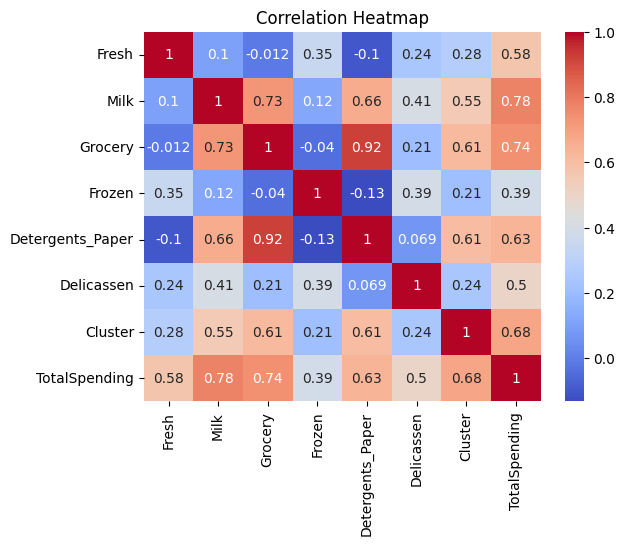

In [ ]:
correlation = wholesale_customers.iloc[:, 2:].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
wholesale_customers['TotalSpending'] = wholesale_customers.iloc[:, 2:].sum(axis=1)
print(wholesale_customers[['Region', 'Channel', 'TotalSpending']].sort_values('TotalSpending', ascending=False).head(10))


     Region  Channel  TotalSpending
85        3        2         399786
47        3        2         385432
181       3        1         380340
183       3        1         371368
61        3        2         331766
86        3        2         300998
325       2        1         261756
333       2        2         240586
23        3        2         221662
211       1        2         214314


# Profitability Analysis

In [ ]:
wholesale_customers['Profit'] = wholesale_customers['Grocery'] * 0.2  # Assuming 20% margin
print(wholesale_customers[['Region', 'Profit']].groupby('Region').sum())


          Profit
Region          
1       114007.4
2        86654.8
3       499050.2


# Key Findings

**Summary Statistics**

Spending varies significantly across categories, with the highest average spend in Fresh and the lowest in Delicassen.
There is a wide range in spending (minimum to maximum), indicating diverse customer behavior.

**Spending Distribution**

Most categories exhibit significant outliers, especially in Fresh, Frozen, and Detergents_Paper. These may represent high-value or bulk-buying customers.

**Correlation Heatmap**

Grocery and Detergents_Paper show a strong positive correlation (0.92), indicating that customers spending on groceries also tend to spend on detergents.
Milk is moderately correlated with both Grocery (0.73) and Detergents_Paper (0.66).
Low or negative correlations between other categories suggest distinct spending patterns.

**Top Spenders by Category**

Region 3, Channel 1, dominates in high spending across all categories.
Specific customers in Fresh, Milk, and Grocery categories spend significantly more than others, indicating potential opportunities for premium services.

**Spending by Region**

Region 3 has the highest average spending across most categories, indicating it’s a lucrative market.
Region 1 and Region 2 have similar spending profiles but significantly lower than Region 3.

**Spending by Channel**

Customers in Channel 2 (likely Horeca - Hotels/Restaurants/Cafes) outspend those in Channel 1 (Retail) in Fresh, Grocery, and Detergents_Paper.
Channel 1 shows a more balanced spending distribution across categories.

**Outliers**

High outliers are found across all categories, with certain customers
spending significantly above the 95th percentile. These customers could be VIP or bulk buyers.

**Spending Distribution:**

Region 3 exhibits the highest total spending across categories, especially in Milk, Grocery, and Detergents_Paper.
Fresh products dominate in spending, followed by Grocery and Milk, while Delicatessen and Frozen categories have comparatively lower expenditures.

**Correlations:**

Strong positive correlation exists between Grocery, Milk, and Detergents_Paper, suggesting these categories may appeal to similar customer segments.
Fresh and Frozen categories show weak or no correlation with other categories, indicating unique customer preferences.

**Regional and Channel Insights:**

Region 3 leads in all spending categories, indicating a dominant market position.
Channel 1 (presumably Horeca) shows higher spending in Fresh and Frozen, suggesting focus on perishable goods.
Channel 2 (presumably Retail) is heavily focused on Milk, Grocery, and Detergents_Paper, aligning with household essentials.

**Customer Segmentation (K-Means Clustering):**

Cluster 0: Customers with average spending across all categories.
Cluster 1: High spenders in Fresh, Frozen, and Delicatessen categories.
Cluster 2: High spenders in Milk, Grocery, and Detergents_Paper.
Outliers:

Several outliers exist, especially in high spenders for Fresh, Milk, and Grocery categories, indicating potential B2B customers or unusual purchase behavior.

**Pareto Analysis:**

The top 20% of customers account for the majority of total spending, emphasizing a clear priority customer segment.

**Profitability:**

Assuming a 20% profit margin for Grocery, Region 3 contributes the highest profit, followed by Region 2 and Region 1.

# Business Recommnedations

**Target High-Spending Regions and Channels**

Focus marketing and sales efforts on Region 3, which consistently demonstrates the highest spending across all categories.
Develop tailored services for Channel 2, as these customers spend heavily in Fresh, Grocery, and Detergents_Paper.

**Introduce Cross-Selling Opportunities**

Leverage the strong correlation between Grocery and Detergents_Paper:
Bundle products from these categories together.
Offer discounts or promotions targeting both categories.

**Develop Loyalty Programs for High Spenders**

Identify and reward customers in the top 5% of spending (outliers) to retain them:
Exclusive discounts, personalized offers, or premium services.
Prioritize Channel 2 and high spenders in Region 3.

**Optimize Product Offerings**

Analyze why spending in Delicassen is the lowest and consider either improving product variety or promoting the category.
Increase inventory for high-demand categories like Fresh and Frozen in Channel 2.

**Regional Campaigns**

Invest in targeted campaigns for Region 1 and Region 2 to boost spending, focusing on Milk, Grocery, and Frozen, as these are popular categories.

**Outlier-Specific Strategies**

Engage outliers with special pricing, bulk deals, or loyalty bonuses to maintain their high spending.
Analyze their purchase patterns to identify specific needs and tailor offerings.

**Monitor Correlations for Strategic Decisions**

Use the correlation between categories to predict demand shifts:
A spike in Grocery spending could predict increased Detergents_Paper demand, aiding in inventory management.

**Seasonal Promotions**

If temporal data is available, identify seasonal trends and design category-specific promotions during peak periods (e.g., Fresh and Grocery).

**Category-Specific Strategies**

Bundle Grocery, Milk, and Detergents_Paper as combo offers for Channel 2 (Retail) customers to increase cross-category sales.
For Channel 1 (Horeca), emphasize Fresh and Frozen product quality and introduce loyalty programs to retain high-value customers.

**Outlier Management:**

Analyze outliers for potential business opportunities (e.g., catering businesses, large-scale retailers).
Engage directly with high spenders in Cluster 1 and 2 to offer personalized deals or bulk purchase discounts.

**Operational Focus**

Enhance supply chain efficiency for Region 3 to handle high demand effectively.
Explore logistics improvements for Frozen and Delicatessen products in underperforming regions to increase accessibility.

**Profit Optimization**

Increase the profit margin on Grocery in Region 3 while maintaining competitive pricing to maximize revenue.
Experiment with price adjustments in low-performing categories like Delicatessen to boost demand.

**Customer Retention and Acquisition**

Invest in customer retention programs for the top 20% of customers identified through Pareto analysis.
Utilize RFM segmentation to identify dormant customers and re-engage them with targeted offers.

# AI Reference
                                                  
OpenAI. (2024, December 11). ChatGPT [Large language model]. Retrieved from https://chatgpt.com/c/675990c3-26cc-800d-9c08-02718343e0a6